##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# 기본 분류: 의류 이미지 분류

<table class="tfo-notebook-buttons" align="left">
  <td>     <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png">TensorFlow.org에서 보기</a>   </td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ko/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Google Colab에서 실행</a></td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ko/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">GitHub에서 소스 보기</a></td>
  <td><a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ko/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">노트북 다운로드</a></td>
</table>

이 튜토리얼에서는 운동화나 셔츠 같은 옷 이미지를 분류하는 신경망 모델을 훈련합니다. 상세 내용을 모두 이해하지 못해도 괜찮습니다. 여기서는 완전한 텐서플로(TensorFlow) 프로그램을 빠르게 살펴 보겠습니다. 자세한 내용은 앞으로 배우면서 더 설명합니다.

여기에서는 텐서플로 모델을 만들고 훈련할 수 있는 고수준 API인 [tf.keras](https://www.tensorflow.org/guide/keras)를 사용합니다.

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


## 패션 MNIST 데이터셋 임포트하기

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋을 사용하겠습니다. 이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 옷 품목을 나타냅니다:

<table>
  <tr><td>     <img src="https://tensorflow.org/images/fashion-mnist-sprite.png" alt="Fashion MNIST sprite" width="600">   </td></tr>
  <tr><td align="center">     <b>그림 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br>{nbsp}   </td></tr>
</table>

패션 MNIST는 컴퓨터 비전 분야의 "Hello, World" 프로그램격인 고전 [MNIST](http://yann.lecun.com/exdb/mnist/) 데이터셋을 대신해서 자주 사용됩니다. MNIST 데이터셋은 손글씨 숫자(0, 1, 2 등)의 이미지로 이루어져 있습니다. 여기서 사용하려는 옷 이미지와 동일한 포맷입니다.

패션 MNIST는 일반적인 MNIST 보다 조금 더 어려운 문제이고 다양한 예제를 만들기 위해 선택했습니다. 두 데이터셋은 비교적 작기 때문에 알고리즘의 작동 여부를 확인하기 위해 사용되곤 합니다. 코드를 테스트하고 디버깅하는 용도로 좋습니다.

여기에서 60,000개의 이미지를 사용하여 네트워크를 훈련하고 10,000개의 이미지를 사용하여 네트워크에서 이미지 분류를 학습한 정도를 평가합니다. TensorFlow에서 직접 Fashion MNIST에 액세스할 수 있습니다. TensorFlow에서 직접 [Fashion MNIST 데이터](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data)를 가져오고 로드합니다.

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

16384/29515 [===============>..............] - ETA: 0s

32768/29515 [=================================] - 0s 0us/step


40960/29515 [=========================================] - 0s 0us/step


   16384/26421880 [..............................] - ETA: 0s

 4734976/26421880 [====>.........................] - ETA: 0s

16785408/26421880 [==================>...........] - ETA: 0s

26427392/26421880 [==============================] - 0s 0us/step


26435584/26421880 [==============================] - 0s 0us/step


16384/5148 [===============================================================================================] - 0s 0us/step


  16384/4422102 [..............................] - ETA: 0s

4423680/4422102 [==============================] - 0s 0us/step


4431872/4422102 [==============================] - 0s 0us/step


load_data() 함수를 호출하면 네 개의 넘파이(NumPy) 배열이 반환됩니다:

- `train_images`와 `train_labels` 배열은 모델 학습에 사용되는 *훈련 세트*입니다.
- `test_images`와 `test_labels` 배열은 모델 테스트에 사용되는 *테스트 세트*입니다.

이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이입니다. *레이블*(label)은 0에서 9까지의 정수 배열입니다. 이 값은 이미지에 있는 옷의 *클래스*(class)를 나타냅니다:

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

각 이미지는 하나의 레이블에 매핑되어 있습니다. 데이터셋에 *클래스 이름*이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장합니다:

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 탐색

모델을 훈련하기 전에 데이터셋 구조를 살펴보죠. 다음 코드는 훈련 세트에 60,000개의 이미지가 있다는 것을 보여줍니다. 각 이미지는 28x28 픽셀로 표현됩니다:

In [6]:
train_images.shape

(60000, 28, 28)

비슷하게 훈련 세트에는 60,000개의 레이블이 있습니다:

In [7]:
len(train_labels)

60000

각 레이블은 0과 9사이의 정수입니다:

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

테스트 세트에는 10,000개의 이미지가 있습니다. 이 이미지도 28x28 픽셀로 표현됩니다:

In [9]:
test_images.shape

(10000, 28, 28)

테스트 세트는 10,000개의 이미지에 대한 레이블을 가지고 있습니다:

In [10]:
len(test_labels)

10000

## 데이터 전처리

네트워크를 훈련하기 전에 데이터를 전처리해야 합니다. 훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이라는 것을 알 수 있습니다:

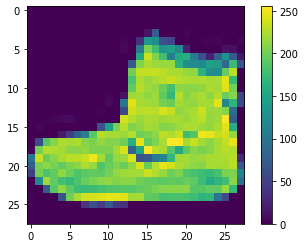

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정하겠습니다. 이렇게 하려면 255로 나누어야 합니다. *훈련 세트*와 *테스트 세트*를 동일한 방식으로 전처리하는 것이 중요합니다:

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

*훈련 세트*에서 처음 25개 이미지와 그 아래 클래스 이름을 출력해 보죠. 데이터 포맷이 올바른지 확인하고 네트워크 구성과 훈련할 준비를 마칩니다.

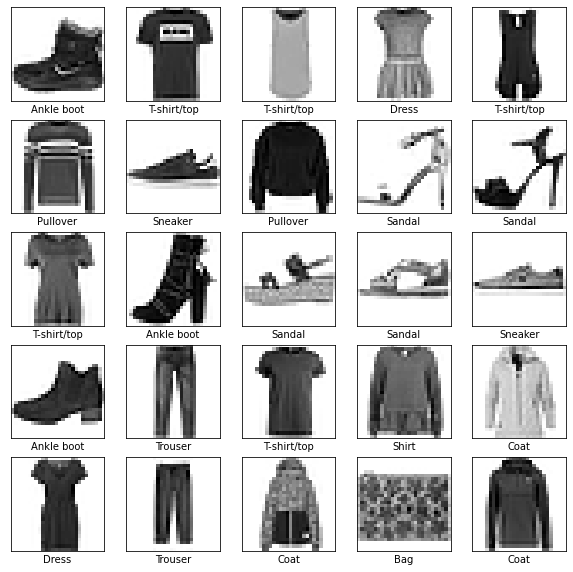

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델 구성

신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일합니다.

### 층 설정

신경망의 기본 빌딩 블록은 [*레이어*](https://www.tensorflow.org/api_docs/python/tf/keras/layers) 입니다. 레이어는 레이어에 공급된 데이터로부터 표현을 추출합니다. 이러한 표현은 당면한 문제에 의미가 있어야 합니다.

대부분 딥러닝은 간단한 층을 연결하여 구성됩니다. `tf.keras.layers.Dense`와 같은 층들의 가중치(parameter)는 훈련하는 동안 학습됩니다.

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

이 네트워크의 첫 번째 층인 `tf.keras.layers.Flatten`은 2차원 배열(28 x 28 픽셀)의 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환합니다. 이 층은 이미지에 있는 픽셀의 행을 펼쳐서 일렬로 늘립니다. 이 층에는 학습되는 가중치가 없고 데이터를 변환하기만 합니다.

픽셀을 펼친 후에는 두 개의 `tf.keras.layers.Dense` 층이 연속되어 연결됩니다. 이 층을 밀집 연결(densely-connected) 또는 완전 연결(fully-connected) 층이라고 부릅니다. 첫 번째 `Dense` 층은 128개의 노드(또는 뉴런)를 가집니다. 두 번째 (마지막) 층은 10개의 노드의 *소프트맥스*(softmax) 층입니다. 이 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1입니다. 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력합니다.

### 모델 컴파일

모델을 훈련할 준비가 되기 전에 몇 가지 설정이 더 필요합니다. 다음은 모델의 [*컴파일*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) 단계에서 추가됩니다.

- [*손실 함수*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) - 훈련 중 모델이 얼마나 정확한지 측정합니다. 모델을 올바른 방향으로 "조정"하려면 이 함수를 최소화해야 합니다.
- [*옵티마이저*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) - 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식입니다.
- [*메트릭*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) — 훈련 및 테스트 단계를 모니터링하는 데 사용됩니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 *정확도*를 사용합니다.

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 모델 훈련

신경망 모델을 훈련하려면 다음 단계가 필요합니다.

1. 훈련 데이터를 모델에 주입합니다-이 예에서는 `train_images`와 `train_labels` 배열입니다.
2. 모델이 이미지와 레이블을 매핑하는 방법을 배웁니다.
3. 테스트 세트에 대한 모델의 예측을 만듭니다-이 예에서는 `test_images` 배열입니다. 이 예측이 `test_labels` 배열의 레이블과 맞는지 확인합니다.
4. 예측이 `test_labels` 배열의 레이블과 일치하는지 확인합니다.


### 모델 피드

훈련을 시작하려면 [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) 메서드를 호출합니다. 모델을 훈련 데이터에 "맞추기(fit)" 때문에 이렇게 불립니다.

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


   1/1875 [..............................] - ETA: 19:40 - loss: 2.4200 - accuracy: 0.0625

  35/1875 [..............................] - ETA: 2s - loss: 1.2933 - accuracy: 0.5411   

  70/1875 [>.............................] - ETA: 2s - loss: 1.0711 - accuracy: 0.6143

 105/1875 [>.............................] - ETA: 2s - loss: 0.9480 - accuracy: 0.6610

 140/1875 [=>............................] - ETA: 2s - loss: 0.8886 - accuracy: 0.6859

 176/1875 [=>............................] - ETA: 2s - loss: 0.8312 - accuracy: 0.7106

 210/1875 [==>...........................] - ETA: 2s - loss: 0.8052 - accuracy: 0.7196

 245/1875 [==>...........................] - ETA: 2s - loss: 0.7819 - accuracy: 0.7284

 280/1875 [===>..........................] - ETA: 2s - loss: 0.7599 - accuracy: 0.7376

 316/1875 [====>.........................] - ETA: 2s - loss: 0.7341 - accuracy: 0.7466

 353/1875 [====>.........................] - ETA: 2s - loss: 0.7146 - accuracy: 0.7530

 389/1875 [=====>........................] - ETA: 2s - loss: 0.6987 - accuracy: 0.7591

 426/1875 [=====>........................] - ETA: 2s - loss: 0.6897 - accuracy: 0.7604

 464/1875 [======>.......................] - ETA: 2s - loss: 0.6749 - accuracy: 0.7650

 502/1875 [=======>......................] - ETA: 1s - loss: 0.6604 - accuracy: 0.7708

 540/1875 [=======>......................] - ETA: 1s - loss: 0.6478 - accuracy: 0.7750

 577/1875 [========>.....................] - ETA: 1s - loss: 0.6379 - accuracy: 0.7777

 613/1875 [========>.....................] - ETA: 1s - loss: 0.6291 - accuracy: 0.7801

 650/1875 [=========>....................] - ETA: 1s - loss: 0.6190 - accuracy: 0.7836

 686/1875 [=========>....................] - ETA: 1s - loss: 0.6113 - accuracy: 0.7866

 723/1875 [==========>...................] - ETA: 1s - loss: 0.6061 - accuracy: 0.7893

 758/1875 [===========>..................] - ETA: 1s - loss: 0.6000 - accuracy: 0.7913

 793/1875 [===========>..................] - ETA: 1s - loss: 0.5949 - accuracy: 0.7927

 828/1875 [============>.................] - ETA: 1s - loss: 0.5884 - accuracy: 0.7950

 865/1875 [============>.................] - ETA: 1s - loss: 0.5834 - accuracy: 0.7965

 899/1875 [=============>................] - ETA: 1s - loss: 0.5777 - accuracy: 0.7983

 935/1875 [=============>................] - ETA: 1s - loss: 0.5742 - accuracy: 0.7997

 972/1875 [==============>...............] - ETA: 1s - loss: 0.5682 - accuracy: 0.8017

1009/1875 [===============>..............] - ETA: 1s - loss: 0.5650 - accuracy: 0.8026

1048/1875 [===============>..............] - ETA: 1s - loss: 0.5598 - accuracy: 0.8044

1086/1875 [================>.............] - ETA: 1s - loss: 0.5553 - accuracy: 0.8059

1121/1875 [================>.............] - ETA: 1s - loss: 0.5514 - accuracy: 0.8073

1158/1875 [=================>............] - ETA: 1s - loss: 0.5482 - accuracy: 0.8083

1196/1875 [==================>...........] - ETA: 0s - loss: 0.5433 - accuracy: 0.8098

1234/1875 [==================>...........] - ETA: 0s - loss: 0.5413 - accuracy: 0.8106

1271/1875 [===================>..........] - ETA: 0s - loss: 0.5382 - accuracy: 0.8115

1308/1875 [===================>..........] - ETA: 0s - loss: 0.5346 - accuracy: 0.8127

1347/1875 [====================>.........] - ETA: 0s - loss: 0.5326 - accuracy: 0.8132

1383/1875 [=====================>........] - ETA: 0s - loss: 0.5301 - accuracy: 0.8139

1420/1875 [=====================>........] - ETA: 0s - loss: 0.5277 - accuracy: 0.8148

1456/1875 [======================>.......] - ETA: 0s - loss: 0.5262 - accuracy: 0.8154

1490/1875 [======================>.......] - ETA: 0s - loss: 0.5235 - accuracy: 0.8163

1523/1875 [=======================>......] - ETA: 0s - loss: 0.5216 - accuracy: 0.8168

1559/1875 [=======================>......] - ETA: 0s - loss: 0.5184 - accuracy: 0.8181

1594/1875 [========================>.....] - ETA: 0s - loss: 0.5160 - accuracy: 0.8188

1631/1875 [=========================>....] - ETA: 0s - loss: 0.5135 - accuracy: 0.8197

1667/1875 [=========================>....] - ETA: 0s - loss: 0.5120 - accuracy: 0.8202

1702/1875 [==========================>...] - ETA: 0s - loss: 0.5097 - accuracy: 0.8209

1737/1875 [==========================>...] - ETA: 0s - loss: 0.5075 - accuracy: 0.8216

1773/1875 [===========================>..] - ETA: 0s - loss: 0.5055 - accuracy: 0.8222

1809/1875 [===========================>..] - ETA: 0s - loss: 0.5026 - accuracy: 0.8234

1846/1875 [============================>.] - ETA: 0s - loss: 0.5009 - accuracy: 0.8241

1875/1875 [==============================] - 3s 1ms/step - loss: 0.4989 - accuracy: 0.8247


Epoch 2/10
   1/1875 [..............................] - ETA: 2s - loss: 0.1706 - accuracy: 0.9688

  36/1875 [..............................] - ETA: 2s - loss: 0.3977 - accuracy: 0.8724

  71/1875 [>.............................] - ETA: 2s - loss: 0.4107 - accuracy: 0.8565

 109/1875 [>.............................] - ETA: 2s - loss: 0.4080 - accuracy: 0.8584

 146/1875 [=>............................] - ETA: 2s - loss: 0.4105 - accuracy: 0.8583

 182/1875 [=>............................] - ETA: 2s - loss: 0.4116 - accuracy: 0.8573

 221/1875 [==>...........................] - ETA: 2s - loss: 0.4064 - accuracy: 0.8577

 259/1875 [===>..........................] - ETA: 2s - loss: 0.3963 - accuracy: 0.8602

 297/1875 [===>..........................] - ETA: 2s - loss: 0.3936 - accuracy: 0.8611

 334/1875 [====>.........................] - ETA: 2s - loss: 0.3942 - accuracy: 0.8610

 370/1875 [====>.........................] - ETA: 2s - loss: 0.3907 - accuracy: 0.8617

 406/1875 [=====>........................] - ETA: 2s - loss: 0.3914 - accuracy: 0.8608

 442/1875 [======>.......................] - ETA: 1s - loss: 0.3913 - accuracy: 0.8614

 480/1875 [======>.......................] - ETA: 1s - loss: 0.3863 - accuracy: 0.8633

 517/1875 [=======>......................] - ETA: 1s - loss: 0.3859 - accuracy: 0.8635

 555/1875 [=======>......................] - ETA: 1s - loss: 0.3856 - accuracy: 0.8634

 593/1875 [========>.....................] - ETA: 1s - loss: 0.3854 - accuracy: 0.8632

 632/1875 [=========>....................] - ETA: 1s - loss: 0.3852 - accuracy: 0.8624

 671/1875 [=========>....................] - ETA: 1s - loss: 0.3843 - accuracy: 0.8629

 708/1875 [==========>...................] - ETA: 1s - loss: 0.3807 - accuracy: 0.8644

 743/1875 [==========>...................] - ETA: 1s - loss: 0.3796 - accuracy: 0.8648

 781/1875 [===========>..................] - ETA: 1s - loss: 0.3787 - accuracy: 0.8646

 819/1875 [============>.................] - ETA: 1s - loss: 0.3787 - accuracy: 0.8648

 858/1875 [============>.................] - ETA: 1s - loss: 0.3790 - accuracy: 0.8654

 895/1875 [=============>................] - ETA: 1s - loss: 0.3799 - accuracy: 0.8648

 932/1875 [=============>................] - ETA: 1s - loss: 0.3798 - accuracy: 0.8648

 969/1875 [==============>...............] - ETA: 1s - loss: 0.3799 - accuracy: 0.8645

1008/1875 [===============>..............] - ETA: 1s - loss: 0.3801 - accuracy: 0.8642

1045/1875 [===============>..............] - ETA: 1s - loss: 0.3798 - accuracy: 0.8644

1080/1875 [================>.............] - ETA: 1s - loss: 0.3799 - accuracy: 0.8644

1116/1875 [================>.............] - ETA: 1s - loss: 0.3798 - accuracy: 0.8643

1150/1875 [=================>............] - ETA: 0s - loss: 0.3793 - accuracy: 0.8646

1184/1875 [=================>............] - ETA: 0s - loss: 0.3795 - accuracy: 0.8648

1219/1875 [==================>...........] - ETA: 0s - loss: 0.3787 - accuracy: 0.8649

1256/1875 [===================>..........] - ETA: 0s - loss: 0.3780 - accuracy: 0.8653

1293/1875 [===================>..........] - ETA: 0s - loss: 0.3785 - accuracy: 0.8652

1331/1875 [====================>.........] - ETA: 0s - loss: 0.3765 - accuracy: 0.8658

1369/1875 [====================>.........] - ETA: 0s - loss: 0.3773 - accuracy: 0.8655

1407/1875 [=====================>........] - ETA: 0s - loss: 0.3766 - accuracy: 0.8656

1444/1875 [======================>.......] - ETA: 0s - loss: 0.3760 - accuracy: 0.8660

1479/1875 [======================>.......] - ETA: 0s - loss: 0.3764 - accuracy: 0.8658

1515/1875 [=======================>......] - ETA: 0s - loss: 0.3762 - accuracy: 0.8660

1552/1875 [=======================>......] - ETA: 0s - loss: 0.3751 - accuracy: 0.8663

1588/1875 [========================>.....] - ETA: 0s - loss: 0.3746 - accuracy: 0.8663

1625/1875 [=========================>....] - ETA: 0s - loss: 0.3750 - accuracy: 0.8662

1664/1875 [=========================>....] - ETA: 0s - loss: 0.3745 - accuracy: 0.8660

1703/1875 [==========================>...] - ETA: 0s - loss: 0.3750 - accuracy: 0.8659

1740/1875 [==========================>...] - ETA: 0s - loss: 0.3746 - accuracy: 0.8661

1777/1875 [===========================>..] - ETA: 0s - loss: 0.3741 - accuracy: 0.8661

1816/1875 [============================>.] - ETA: 0s - loss: 0.3732 - accuracy: 0.8665

1855/1875 [============================>.] - ETA: 0s - loss: 0.3727 - accuracy: 0.8666

1875/1875 [==============================] - 3s 1ms/step - loss: 0.3724 - accuracy: 0.8668


Epoch 3/10
   1/1875 [..............................] - ETA: 3s - loss: 0.2434 - accuracy: 0.9375

  40/1875 [..............................] - ETA: 2s - loss: 0.3252 - accuracy: 0.8883

  77/1875 [>.............................] - ETA: 2s - loss: 0.3422 - accuracy: 0.8795

 112/1875 [>.............................] - ETA: 2s - loss: 0.3361 - accuracy: 0.8803

 149/1875 [=>............................] - ETA: 2s - loss: 0.3410 - accuracy: 0.8781

 186/1875 [=>............................] - ETA: 2s - loss: 0.3443 - accuracy: 0.8785

 225/1875 [==>...........................] - ETA: 2s - loss: 0.3457 - accuracy: 0.8758

 264/1875 [===>..........................] - ETA: 2s - loss: 0.3433 - accuracy: 0.8768

 302/1875 [===>..........................] - ETA: 2s - loss: 0.3432 - accuracy: 0.8752

 339/1875 [====>.........................] - ETA: 2s - loss: 0.3396 - accuracy: 0.8777

 376/1875 [=====>........................] - ETA: 2s - loss: 0.3421 - accuracy: 0.8765

 413/1875 [=====>........................] - ETA: 1s - loss: 0.3436 - accuracy: 0.8758

 451/1875 [======>.......................] - ETA: 1s - loss: 0.3406 - accuracy: 0.8767

 487/1875 [======>.......................] - ETA: 1s - loss: 0.3409 - accuracy: 0.8760

 525/1875 [=======>......................] - ETA: 1s - loss: 0.3412 - accuracy: 0.8760

 562/1875 [=======>......................] - ETA: 1s - loss: 0.3415 - accuracy: 0.8761

 599/1875 [========>.....................] - ETA: 1s - loss: 0.3403 - accuracy: 0.8766

 637/1875 [=========>....................] - ETA: 1s - loss: 0.3384 - accuracy: 0.8770

 674/1875 [=========>....................] - ETA: 1s - loss: 0.3376 - accuracy: 0.8767

 710/1875 [==========>...................] - ETA: 1s - loss: 0.3381 - accuracy: 0.8764

 746/1875 [==========>...................] - ETA: 1s - loss: 0.3369 - accuracy: 0.8766

 784/1875 [===========>..................] - ETA: 1s - loss: 0.3382 - accuracy: 0.8764

 822/1875 [============>.................] - ETA: 1s - loss: 0.3369 - accuracy: 0.8767

 859/1875 [============>.................] - ETA: 1s - loss: 0.3370 - accuracy: 0.8766

 897/1875 [=============>................] - ETA: 1s - loss: 0.3379 - accuracy: 0.8763

 934/1875 [=============>................] - ETA: 1s - loss: 0.3371 - accuracy: 0.8766

 971/1875 [==============>...............] - ETA: 1s - loss: 0.3352 - accuracy: 0.8772

1010/1875 [===============>..............] - ETA: 1s - loss: 0.3349 - accuracy: 0.8772

1048/1875 [===============>..............] - ETA: 1s - loss: 0.3356 - accuracy: 0.8770

1085/1875 [================>.............] - ETA: 1s - loss: 0.3363 - accuracy: 0.8768

1123/1875 [================>.............] - ETA: 1s - loss: 0.3346 - accuracy: 0.8776

1160/1875 [=================>............] - ETA: 0s - loss: 0.3350 - accuracy: 0.8774

1197/1875 [==================>...........] - ETA: 0s - loss: 0.3347 - accuracy: 0.8776

1233/1875 [==================>...........] - ETA: 0s - loss: 0.3353 - accuracy: 0.8774

1269/1875 [===================>..........] - ETA: 0s - loss: 0.3347 - accuracy: 0.8776

1306/1875 [===================>..........] - ETA: 0s - loss: 0.3337 - accuracy: 0.8776

1344/1875 [====================>.........] - ETA: 0s - loss: 0.3337 - accuracy: 0.8775

1382/1875 [=====================>........] - ETA: 0s - loss: 0.3335 - accuracy: 0.8775

1418/1875 [=====================>........] - ETA: 0s - loss: 0.3331 - accuracy: 0.8778

1453/1875 [======================>.......] - ETA: 0s - loss: 0.3337 - accuracy: 0.8776

1489/1875 [======================>.......] - ETA: 0s - loss: 0.3331 - accuracy: 0.8781

1526/1875 [=======================>......] - ETA: 0s - loss: 0.3330 - accuracy: 0.8784

1564/1875 [========================>.....] - ETA: 0s - loss: 0.3325 - accuracy: 0.8787

1601/1875 [========================>.....] - ETA: 0s - loss: 0.3328 - accuracy: 0.8783

1638/1875 [=========================>....] - ETA: 0s - loss: 0.3327 - accuracy: 0.8785

1677/1875 [=========================>....] - ETA: 0s - loss: 0.3331 - accuracy: 0.8782

1716/1875 [==========================>...] - ETA: 0s - loss: 0.3335 - accuracy: 0.8783

1755/1875 [===========================>..] - ETA: 0s - loss: 0.3344 - accuracy: 0.8778

1794/1875 [===========================>..] - ETA: 0s - loss: 0.3341 - accuracy: 0.8779

1833/1875 [============================>.] - ETA: 0s - loss: 0.3331 - accuracy: 0.8784

1871/1875 [============================>.] - ETA: 0s - loss: 0.3334 - accuracy: 0.8786

1875/1875 [==============================] - 3s 1ms/step - loss: 0.3333 - accuracy: 0.8786


Epoch 4/10
   1/1875 [..............................] - ETA: 2s - loss: 0.1576 - accuracy: 1.0000

  38/1875 [..............................] - ETA: 2s - loss: 0.3072 - accuracy: 0.8824

  77/1875 [>.............................] - ETA: 2s - loss: 0.2952 - accuracy: 0.8851

 116/1875 [>.............................] - ETA: 2s - loss: 0.2993 - accuracy: 0.8874

 153/1875 [=>............................] - ETA: 2s - loss: 0.3081 - accuracy: 0.8883

 191/1875 [==>...........................] - ETA: 2s - loss: 0.3099 - accuracy: 0.8879

 228/1875 [==>...........................] - ETA: 2s - loss: 0.3042 - accuracy: 0.8895

 266/1875 [===>..........................] - ETA: 2s - loss: 0.3069 - accuracy: 0.8883

 301/1875 [===>..........................] - ETA: 2s - loss: 0.3045 - accuracy: 0.8890

 336/1875 [====>.........................] - ETA: 2s - loss: 0.3077 - accuracy: 0.8869

 370/1875 [====>.........................] - ETA: 2s - loss: 0.3103 - accuracy: 0.8871

 404/1875 [=====>........................] - ETA: 2s - loss: 0.3111 - accuracy: 0.8854

 437/1875 [=====>........................] - ETA: 2s - loss: 0.3126 - accuracy: 0.8845

 470/1875 [======>.......................] - ETA: 1s - loss: 0.3120 - accuracy: 0.8847

 506/1875 [=======>......................] - ETA: 1s - loss: 0.3125 - accuracy: 0.8851

 543/1875 [=======>......................] - ETA: 1s - loss: 0.3139 - accuracy: 0.8848

 580/1875 [========>.....................] - ETA: 1s - loss: 0.3140 - accuracy: 0.8846

 617/1875 [========>.....................] - ETA: 1s - loss: 0.3132 - accuracy: 0.8849

 651/1875 [=========>....................] - ETA: 1s - loss: 0.3146 - accuracy: 0.8846

 686/1875 [=========>....................] - ETA: 1s - loss: 0.3135 - accuracy: 0.8848

 721/1875 [==========>...................] - ETA: 1s - loss: 0.3134 - accuracy: 0.8850

 757/1875 [===========>..................] - ETA: 1s - loss: 0.3127 - accuracy: 0.8850

 794/1875 [===========>..................] - ETA: 1s - loss: 0.3128 - accuracy: 0.8852

 832/1875 [============>.................] - ETA: 1s - loss: 0.3115 - accuracy: 0.8855

 870/1875 [============>.................] - ETA: 1s - loss: 0.3107 - accuracy: 0.8856

 907/1875 [=============>................] - ETA: 1s - loss: 0.3099 - accuracy: 0.8854

 944/1875 [==============>...............] - ETA: 1s - loss: 0.3100 - accuracy: 0.8857

 982/1875 [==============>...............] - ETA: 1s - loss: 0.3101 - accuracy: 0.8858

1018/1875 [===============>..............] - ETA: 1s - loss: 0.3109 - accuracy: 0.8851

1054/1875 [===============>..............] - ETA: 1s - loss: 0.3109 - accuracy: 0.8852

1091/1875 [================>.............] - ETA: 1s - loss: 0.3100 - accuracy: 0.8856

1128/1875 [=================>............] - ETA: 1s - loss: 0.3103 - accuracy: 0.8854

1165/1875 [=================>............] - ETA: 0s - loss: 0.3110 - accuracy: 0.8848

1202/1875 [==================>...........] - ETA: 0s - loss: 0.3109 - accuracy: 0.8851

1240/1875 [==================>...........] - ETA: 0s - loss: 0.3110 - accuracy: 0.8852

1278/1875 [===================>..........] - ETA: 0s - loss: 0.3100 - accuracy: 0.8855

1316/1875 [====================>.........] - ETA: 0s - loss: 0.3096 - accuracy: 0.8854

1355/1875 [====================>.........] - ETA: 0s - loss: 0.3097 - accuracy: 0.8856

1394/1875 [=====================>........] - ETA: 0s - loss: 0.3099 - accuracy: 0.8855

1434/1875 [=====================>........] - ETA: 0s - loss: 0.3105 - accuracy: 0.8853

1473/1875 [======================>.......] - ETA: 0s - loss: 0.3103 - accuracy: 0.8855

1512/1875 [=======================>......] - ETA: 0s - loss: 0.3103 - accuracy: 0.8854

1551/1875 [=======================>......] - ETA: 0s - loss: 0.3109 - accuracy: 0.8853

1587/1875 [========================>.....] - ETA: 0s - loss: 0.3114 - accuracy: 0.8853

1624/1875 [========================>.....] - ETA: 0s - loss: 0.3114 - accuracy: 0.8852

1661/1875 [=========================>....] - ETA: 0s - loss: 0.3111 - accuracy: 0.8851

1699/1875 [==========================>...] - ETA: 0s - loss: 0.3106 - accuracy: 0.8856

1735/1875 [==========================>...] - ETA: 0s - loss: 0.3110 - accuracy: 0.8855

1768/1875 [===========================>..] - ETA: 0s - loss: 0.3107 - accuracy: 0.8854

1802/1875 [===========================>..] - ETA: 0s - loss: 0.3105 - accuracy: 0.8855

1836/1875 [============================>.] - ETA: 0s - loss: 0.3108 - accuracy: 0.8854

1870/1875 [============================>.] - ETA: 0s - loss: 0.3102 - accuracy: 0.8856

1875/1875 [==============================] - 3s 1ms/step - loss: 0.3104 - accuracy: 0.8855


Epoch 5/10
   1/1875 [..............................] - ETA: 3s - loss: 0.2447 - accuracy: 0.9062

  34/1875 [..............................] - ETA: 2s - loss: 0.2669 - accuracy: 0.9053

  68/1875 [>.............................] - ETA: 2s - loss: 0.2732 - accuracy: 0.8984

 104/1875 [>.............................] - ETA: 2s - loss: 0.2745 - accuracy: 0.8978

 140/1875 [=>............................] - ETA: 2s - loss: 0.2743 - accuracy: 0.8964

 175/1875 [=>............................] - ETA: 2s - loss: 0.2747 - accuracy: 0.8945

 211/1875 [==>...........................] - ETA: 2s - loss: 0.2825 - accuracy: 0.8913

 245/1875 [==>...........................] - ETA: 2s - loss: 0.2869 - accuracy: 0.8903

 282/1875 [===>..........................] - ETA: 2s - loss: 0.2863 - accuracy: 0.8911

 319/1875 [====>.........................] - ETA: 2s - loss: 0.2856 - accuracy: 0.8903

 355/1875 [====>.........................] - ETA: 2s - loss: 0.2888 - accuracy: 0.8890

 392/1875 [=====>........................] - ETA: 2s - loss: 0.2901 - accuracy: 0.8890

 430/1875 [=====>........................] - ETA: 2s - loss: 0.2922 - accuracy: 0.8876

 465/1875 [======>.......................] - ETA: 1s - loss: 0.2896 - accuracy: 0.8895

 501/1875 [=======>......................] - ETA: 1s - loss: 0.2895 - accuracy: 0.8897

 539/1875 [=======>......................] - ETA: 1s - loss: 0.2898 - accuracy: 0.8902

 576/1875 [========>.....................] - ETA: 1s - loss: 0.2887 - accuracy: 0.8909

 613/1875 [========>.....................] - ETA: 1s - loss: 0.2886 - accuracy: 0.8910

 650/1875 [=========>....................] - ETA: 1s - loss: 0.2880 - accuracy: 0.8915

 687/1875 [=========>....................] - ETA: 1s - loss: 0.2892 - accuracy: 0.8906

 726/1875 [==========>...................] - ETA: 1s - loss: 0.2911 - accuracy: 0.8899

 764/1875 [===========>..................] - ETA: 1s - loss: 0.2901 - accuracy: 0.8903

 801/1875 [===========>..................] - ETA: 1s - loss: 0.2909 - accuracy: 0.8899

 837/1875 [============>.................] - ETA: 1s - loss: 0.2918 - accuracy: 0.8898

 872/1875 [============>.................] - ETA: 1s - loss: 0.2922 - accuracy: 0.8901

 907/1875 [=============>................] - ETA: 1s - loss: 0.2927 - accuracy: 0.8897

 943/1875 [==============>...............] - ETA: 1s - loss: 0.2936 - accuracy: 0.8894

 981/1875 [==============>...............] - ETA: 1s - loss: 0.2945 - accuracy: 0.8892

1020/1875 [===============>..............] - ETA: 1s - loss: 0.2943 - accuracy: 0.8893

1059/1875 [===============>..............] - ETA: 1s - loss: 0.2936 - accuracy: 0.8895

1097/1875 [================>.............] - ETA: 1s - loss: 0.2932 - accuracy: 0.8899

1134/1875 [=================>............] - ETA: 1s - loss: 0.2920 - accuracy: 0.8903

1171/1875 [=================>............] - ETA: 0s - loss: 0.2919 - accuracy: 0.8903

1207/1875 [==================>...........] - ETA: 0s - loss: 0.2912 - accuracy: 0.8908

1245/1875 [==================>...........] - ETA: 0s - loss: 0.2907 - accuracy: 0.8908

1283/1875 [===================>..........] - ETA: 0s - loss: 0.2915 - accuracy: 0.8904

1321/1875 [====================>.........] - ETA: 0s - loss: 0.2908 - accuracy: 0.8909

1355/1875 [====================>.........] - ETA: 0s - loss: 0.2911 - accuracy: 0.8907

1389/1875 [=====================>........] - ETA: 0s - loss: 0.2913 - accuracy: 0.8905

1424/1875 [=====================>........] - ETA: 0s - loss: 0.2908 - accuracy: 0.8908

1460/1875 [======================>.......] - ETA: 0s - loss: 0.2918 - accuracy: 0.8904

1494/1875 [======================>.......] - ETA: 0s - loss: 0.2909 - accuracy: 0.8908

1529/1875 [=======================>......] - ETA: 0s - loss: 0.2913 - accuracy: 0.8910

1565/1875 [========================>.....] - ETA: 0s - loss: 0.2907 - accuracy: 0.8912

1601/1875 [========================>.....] - ETA: 0s - loss: 0.2904 - accuracy: 0.8912

1638/1875 [=========================>....] - ETA: 0s - loss: 0.2919 - accuracy: 0.8908

1673/1875 [=========================>....] - ETA: 0s - loss: 0.2923 - accuracy: 0.8908

1709/1875 [==========================>...] - ETA: 0s - loss: 0.2930 - accuracy: 0.8904

1746/1875 [==========================>...] - ETA: 0s - loss: 0.2928 - accuracy: 0.8907

1782/1875 [===========================>..] - ETA: 0s - loss: 0.2926 - accuracy: 0.8908

1818/1875 [============================>.] - ETA: 0s - loss: 0.2926 - accuracy: 0.8908

1856/1875 [============================>.] - ETA: 0s - loss: 0.2923 - accuracy: 0.8910

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2919 - accuracy: 0.8911


Epoch 6/10
   1/1875 [..............................] - ETA: 2s - loss: 0.3075 - accuracy: 0.8750

  39/1875 [..............................] - ETA: 2s - loss: 0.2923 - accuracy: 0.8878

  77/1875 [>.............................] - ETA: 2s - loss: 0.2825 - accuracy: 0.8933

 113/1875 [>.............................] - ETA: 2s - loss: 0.2696 - accuracy: 0.8996

 149/1875 [=>............................] - ETA: 2s - loss: 0.2702 - accuracy: 0.8979

 183/1875 [=>............................] - ETA: 2s - loss: 0.2712 - accuracy: 0.8969

 221/1875 [==>...........................] - ETA: 2s - loss: 0.2735 - accuracy: 0.8968

 258/1875 [===>..........................] - ETA: 2s - loss: 0.2776 - accuracy: 0.8962

 293/1875 [===>..........................] - ETA: 2s - loss: 0.2786 - accuracy: 0.8942

 329/1875 [====>.........................] - ETA: 2s - loss: 0.2793 - accuracy: 0.8947

 362/1875 [====>.........................] - ETA: 2s - loss: 0.2770 - accuracy: 0.8959

 397/1875 [=====>........................] - ETA: 2s - loss: 0.2763 - accuracy: 0.8969

 432/1875 [=====>........................] - ETA: 2s - loss: 0.2735 - accuracy: 0.8989

 469/1875 [======>.......................] - ETA: 1s - loss: 0.2776 - accuracy: 0.8975

 508/1875 [=======>......................] - ETA: 1s - loss: 0.2787 - accuracy: 0.8966

 545/1875 [=======>......................] - ETA: 1s - loss: 0.2776 - accuracy: 0.8972

 582/1875 [========>.....................] - ETA: 1s - loss: 0.2771 - accuracy: 0.8974

 619/1875 [========>.....................] - ETA: 1s - loss: 0.2760 - accuracy: 0.8985

 656/1875 [=========>....................] - ETA: 1s - loss: 0.2759 - accuracy: 0.8982

 692/1875 [==========>...................] - ETA: 1s - loss: 0.2747 - accuracy: 0.8985

 729/1875 [==========>...................] - ETA: 1s - loss: 0.2758 - accuracy: 0.8980

 767/1875 [===========>..................] - ETA: 1s - loss: 0.2774 - accuracy: 0.8973

 804/1875 [===========>..................] - ETA: 1s - loss: 0.2775 - accuracy: 0.8972

 840/1875 [============>.................] - ETA: 1s - loss: 0.2774 - accuracy: 0.8972

 876/1875 [=============>................] - ETA: 1s - loss: 0.2786 - accuracy: 0.8969

 912/1875 [=============>................] - ETA: 1s - loss: 0.2792 - accuracy: 0.8971

 950/1875 [==============>...............] - ETA: 1s - loss: 0.2803 - accuracy: 0.8970

 986/1875 [==============>...............] - ETA: 1s - loss: 0.2797 - accuracy: 0.8971

1024/1875 [===============>..............] - ETA: 1s - loss: 0.2804 - accuracy: 0.8972

1062/1875 [===============>..............] - ETA: 1s - loss: 0.2797 - accuracy: 0.8976

1100/1875 [================>.............] - ETA: 1s - loss: 0.2800 - accuracy: 0.8972

1139/1875 [=================>............] - ETA: 1s - loss: 0.2806 - accuracy: 0.8970

1177/1875 [=================>............] - ETA: 0s - loss: 0.2808 - accuracy: 0.8974

1213/1875 [==================>...........] - ETA: 0s - loss: 0.2806 - accuracy: 0.8976

1251/1875 [===================>..........] - ETA: 0s - loss: 0.2805 - accuracy: 0.8974

1288/1875 [===================>..........] - ETA: 0s - loss: 0.2802 - accuracy: 0.8974

1324/1875 [====================>.........] - ETA: 0s - loss: 0.2794 - accuracy: 0.8978

1360/1875 [====================>.........] - ETA: 0s - loss: 0.2784 - accuracy: 0.8978

1397/1875 [=====================>........] - ETA: 0s - loss: 0.2784 - accuracy: 0.8977

1433/1875 [=====================>........] - ETA: 0s - loss: 0.2792 - accuracy: 0.8975

1470/1875 [======================>.......] - ETA: 0s - loss: 0.2782 - accuracy: 0.8979

1506/1875 [=======================>......] - ETA: 0s - loss: 0.2775 - accuracy: 0.8981

1544/1875 [=======================>......] - ETA: 0s - loss: 0.2774 - accuracy: 0.8981

1583/1875 [========================>.....] - ETA: 0s - loss: 0.2765 - accuracy: 0.8984

1621/1875 [========================>.....] - ETA: 0s - loss: 0.2773 - accuracy: 0.8983

1657/1875 [=========================>....] - ETA: 0s - loss: 0.2775 - accuracy: 0.8981

1694/1875 [==========================>...] - ETA: 0s - loss: 0.2778 - accuracy: 0.8981

1728/1875 [==========================>...] - ETA: 0s - loss: 0.2771 - accuracy: 0.8983

1764/1875 [===========================>..] - ETA: 0s - loss: 0.2770 - accuracy: 0.8982

1801/1875 [===========================>..] - ETA: 0s - loss: 0.2767 - accuracy: 0.8983

1839/1875 [============================>.] - ETA: 0s - loss: 0.2772 - accuracy: 0.8981

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2779 - accuracy: 0.8978


Epoch 7/10
   1/1875 [..............................] - ETA: 2s - loss: 0.2913 - accuracy: 0.9062

  39/1875 [..............................] - ETA: 2s - loss: 0.2299 - accuracy: 0.9119

  76/1875 [>.............................] - ETA: 2s - loss: 0.2625 - accuracy: 0.9050

 114/1875 [>.............................] - ETA: 2s - loss: 0.2627 - accuracy: 0.9038

 151/1875 [=>............................] - ETA: 2s - loss: 0.2682 - accuracy: 0.9007

 190/1875 [==>...........................] - ETA: 2s - loss: 0.2712 - accuracy: 0.8998

 229/1875 [==>...........................] - ETA: 2s - loss: 0.2677 - accuracy: 0.9000

 266/1875 [===>..........................] - ETA: 2s - loss: 0.2670 - accuracy: 0.8997

 303/1875 [===>..........................] - ETA: 2s - loss: 0.2674 - accuracy: 0.9003

 341/1875 [====>.........................] - ETA: 2s - loss: 0.2675 - accuracy: 0.9008

 378/1875 [=====>........................] - ETA: 2s - loss: 0.2677 - accuracy: 0.9005

 416/1875 [=====>........................] - ETA: 1s - loss: 0.2701 - accuracy: 0.9001

 454/1875 [======>.......................] - ETA: 1s - loss: 0.2703 - accuracy: 0.8996

 492/1875 [======>.......................] - ETA: 1s - loss: 0.2688 - accuracy: 0.8997

 527/1875 [=======>......................] - ETA: 1s - loss: 0.2658 - accuracy: 0.9007

 564/1875 [========>.....................] - ETA: 1s - loss: 0.2657 - accuracy: 0.9012

 601/1875 [========>.....................] - ETA: 1s - loss: 0.2667 - accuracy: 0.9010

 638/1875 [=========>....................] - ETA: 1s - loss: 0.2658 - accuracy: 0.9013

 673/1875 [=========>....................] - ETA: 1s - loss: 0.2650 - accuracy: 0.9017

 709/1875 [==========>...................] - ETA: 1s - loss: 0.2627 - accuracy: 0.9026

 747/1875 [==========>...................] - ETA: 1s - loss: 0.2621 - accuracy: 0.9031

 783/1875 [===========>..................] - ETA: 1s - loss: 0.2632 - accuracy: 0.9027

 821/1875 [============>.................] - ETA: 1s - loss: 0.2631 - accuracy: 0.9029

 858/1875 [============>.................] - ETA: 1s - loss: 0.2622 - accuracy: 0.9032

 894/1875 [=============>................] - ETA: 1s - loss: 0.2625 - accuracy: 0.9028

 931/1875 [=============>................] - ETA: 1s - loss: 0.2627 - accuracy: 0.9029

 969/1875 [==============>...............] - ETA: 1s - loss: 0.2633 - accuracy: 0.9023

1007/1875 [===============>..............] - ETA: 1s - loss: 0.2643 - accuracy: 0.9023

1044/1875 [===============>..............] - ETA: 1s - loss: 0.2628 - accuracy: 0.9027

1080/1875 [================>.............] - ETA: 1s - loss: 0.2631 - accuracy: 0.9024

1117/1875 [================>.............] - ETA: 1s - loss: 0.2626 - accuracy: 0.9026

1152/1875 [=================>............] - ETA: 0s - loss: 0.2621 - accuracy: 0.9028

1187/1875 [=================>............] - ETA: 0s - loss: 0.2609 - accuracy: 0.9030

1223/1875 [==================>...........] - ETA: 0s - loss: 0.2612 - accuracy: 0.9029

1256/1875 [===================>..........] - ETA: 0s - loss: 0.2622 - accuracy: 0.9024

1289/1875 [===================>..........] - ETA: 0s - loss: 0.2608 - accuracy: 0.9030

1321/1875 [====================>.........] - ETA: 0s - loss: 0.2609 - accuracy: 0.9030

1355/1875 [====================>.........] - ETA: 0s - loss: 0.2608 - accuracy: 0.9032

1387/1875 [=====================>........] - ETA: 0s - loss: 0.2609 - accuracy: 0.9031

1420/1875 [=====================>........] - ETA: 0s - loss: 0.2615 - accuracy: 0.9026

1453/1875 [======================>.......] - ETA: 0s - loss: 0.2621 - accuracy: 0.9025

1485/1875 [======================>.......] - ETA: 0s - loss: 0.2624 - accuracy: 0.9023

1518/1875 [=======================>......] - ETA: 0s - loss: 0.2625 - accuracy: 0.9024

1552/1875 [=======================>......] - ETA: 0s - loss: 0.2636 - accuracy: 0.9018

1588/1875 [========================>.....] - ETA: 0s - loss: 0.2639 - accuracy: 0.9016

1625/1875 [=========================>....] - ETA: 0s - loss: 0.2634 - accuracy: 0.9018

1661/1875 [=========================>....] - ETA: 0s - loss: 0.2633 - accuracy: 0.9018

1698/1875 [==========================>...] - ETA: 0s - loss: 0.2633 - accuracy: 0.9018

1734/1875 [==========================>...] - ETA: 0s - loss: 0.2635 - accuracy: 0.9019

1769/1875 [===========================>..] - ETA: 0s - loss: 0.2638 - accuracy: 0.9019

1807/1875 [===========================>..] - ETA: 0s - loss: 0.2645 - accuracy: 0.9014

1843/1875 [============================>.] - ETA: 0s - loss: 0.2642 - accuracy: 0.9012

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2646 - accuracy: 0.9011


Epoch 8/10
   1/1875 [..............................] - ETA: 3s - loss: 0.2706 - accuracy: 0.9062

  35/1875 [..............................] - ETA: 2s - loss: 0.2687 - accuracy: 0.9027

  68/1875 [>.............................] - ETA: 2s - loss: 0.2474 - accuracy: 0.9067

 102/1875 [>.............................] - ETA: 2s - loss: 0.2608 - accuracy: 0.9041

 135/1875 [=>............................] - ETA: 2s - loss: 0.2651 - accuracy: 0.9053

 170/1875 [=>............................] - ETA: 2s - loss: 0.2583 - accuracy: 0.9062

 206/1875 [==>...........................] - ETA: 2s - loss: 0.2565 - accuracy: 0.9067

 241/1875 [==>...........................] - ETA: 2s - loss: 0.2536 - accuracy: 0.9070

 278/1875 [===>..........................] - ETA: 2s - loss: 0.2507 - accuracy: 0.9077

 315/1875 [====>.........................] - ETA: 2s - loss: 0.2527 - accuracy: 0.9063

 351/1875 [====>.........................] - ETA: 2s - loss: 0.2518 - accuracy: 0.9058

 386/1875 [=====>........................] - ETA: 2s - loss: 0.2529 - accuracy: 0.9060

 423/1875 [=====>........................] - ETA: 2s - loss: 0.2512 - accuracy: 0.9061

 459/1875 [======>.......................] - ETA: 2s - loss: 0.2499 - accuracy: 0.9061

 495/1875 [======>.......................] - ETA: 1s - loss: 0.2509 - accuracy: 0.9059

 531/1875 [=======>......................] - ETA: 1s - loss: 0.2501 - accuracy: 0.9060

 567/1875 [========>.....................] - ETA: 1s - loss: 0.2492 - accuracy: 0.9066

 605/1875 [========>.....................] - ETA: 1s - loss: 0.2502 - accuracy: 0.9062

 642/1875 [=========>....................] - ETA: 1s - loss: 0.2527 - accuracy: 0.9051

 681/1875 [=========>....................] - ETA: 1s - loss: 0.2519 - accuracy: 0.9055

 719/1875 [==========>...................] - ETA: 1s - loss: 0.2545 - accuracy: 0.9043

 754/1875 [===========>..................] - ETA: 1s - loss: 0.2559 - accuracy: 0.9038

 787/1875 [===========>..................] - ETA: 1s - loss: 0.2563 - accuracy: 0.9037

 822/1875 [============>.................] - ETA: 1s - loss: 0.2568 - accuracy: 0.9038

 859/1875 [============>.................] - ETA: 1s - loss: 0.2564 - accuracy: 0.9037

 895/1875 [=============>................] - ETA: 1s - loss: 0.2571 - accuracy: 0.9036

 932/1875 [=============>................] - ETA: 1s - loss: 0.2567 - accuracy: 0.9043

 970/1875 [==============>...............] - ETA: 1s - loss: 0.2568 - accuracy: 0.9043

1009/1875 [===============>..............] - ETA: 1s - loss: 0.2557 - accuracy: 0.9047

1047/1875 [===============>..............] - ETA: 1s - loss: 0.2549 - accuracy: 0.9053

1085/1875 [================>.............] - ETA: 1s - loss: 0.2551 - accuracy: 0.9056

1123/1875 [================>.............] - ETA: 1s - loss: 0.2545 - accuracy: 0.9056

1158/1875 [=================>............] - ETA: 1s - loss: 0.2539 - accuracy: 0.9058

1195/1875 [==================>...........] - ETA: 0s - loss: 0.2550 - accuracy: 0.9054

1233/1875 [==================>...........] - ETA: 0s - loss: 0.2557 - accuracy: 0.9050

1268/1875 [===================>..........] - ETA: 0s - loss: 0.2566 - accuracy: 0.9045

1305/1875 [===================>..........] - ETA: 0s - loss: 0.2553 - accuracy: 0.9050

1341/1875 [====================>.........] - ETA: 0s - loss: 0.2554 - accuracy: 0.9052

1379/1875 [=====================>........] - ETA: 0s - loss: 0.2557 - accuracy: 0.9050

1416/1875 [=====================>........] - ETA: 0s - loss: 0.2560 - accuracy: 0.9047

1452/1875 [======================>.......] - ETA: 0s - loss: 0.2561 - accuracy: 0.9045

1488/1875 [======================>.......] - ETA: 0s - loss: 0.2558 - accuracy: 0.9045

1523/1875 [=======================>......] - ETA: 0s - loss: 0.2561 - accuracy: 0.9045

1558/1875 [=======================>......] - ETA: 0s - loss: 0.2564 - accuracy: 0.9042

1595/1875 [========================>.....] - ETA: 0s - loss: 0.2568 - accuracy: 0.9039

1632/1875 [=========================>....] - ETA: 0s - loss: 0.2561 - accuracy: 0.9042

1670/1875 [=========================>....] - ETA: 0s - loss: 0.2559 - accuracy: 0.9042

1709/1875 [==========================>...] - ETA: 0s - loss: 0.2557 - accuracy: 0.9046

1746/1875 [==========================>...] - ETA: 0s - loss: 0.2558 - accuracy: 0.9045

1784/1875 [===========================>..] - ETA: 0s - loss: 0.2558 - accuracy: 0.9046

1821/1875 [============================>.] - ETA: 0s - loss: 0.2557 - accuracy: 0.9044

1858/1875 [============================>.] - ETA: 0s - loss: 0.2561 - accuracy: 0.9043

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2561 - accuracy: 0.9042


Epoch 9/10
   1/1875 [..............................] - ETA: 2s - loss: 0.3627 - accuracy: 0.8750

  37/1875 [..............................] - ETA: 2s - loss: 0.2609 - accuracy: 0.9139

  71/1875 [>.............................] - ETA: 2s - loss: 0.2523 - accuracy: 0.9142

 108/1875 [>.............................] - ETA: 2s - loss: 0.2463 - accuracy: 0.9132

 146/1875 [=>............................] - ETA: 2s - loss: 0.2479 - accuracy: 0.9107

 183/1875 [=>............................] - ETA: 2s - loss: 0.2537 - accuracy: 0.9071

 220/1875 [==>...........................] - ETA: 2s - loss: 0.2528 - accuracy: 0.9065

 258/1875 [===>..........................] - ETA: 2s - loss: 0.2549 - accuracy: 0.9054

 295/1875 [===>..........................] - ETA: 2s - loss: 0.2577 - accuracy: 0.9042

 331/1875 [====>.........................] - ETA: 2s - loss: 0.2593 - accuracy: 0.9031

 368/1875 [====>.........................] - ETA: 2s - loss: 0.2572 - accuracy: 0.9041

 405/1875 [=====>........................] - ETA: 2s - loss: 0.2518 - accuracy: 0.9055

 442/1875 [======>.......................] - ETA: 1s - loss: 0.2500 - accuracy: 0.9063

 478/1875 [======>.......................] - ETA: 1s - loss: 0.2508 - accuracy: 0.9063

 515/1875 [=======>......................] - ETA: 1s - loss: 0.2502 - accuracy: 0.9067

 552/1875 [=======>......................] - ETA: 1s - loss: 0.2503 - accuracy: 0.9071

 589/1875 [========>.....................] - ETA: 1s - loss: 0.2500 - accuracy: 0.9074

 625/1875 [=========>....................] - ETA: 1s - loss: 0.2488 - accuracy: 0.9076

 661/1875 [=========>....................] - ETA: 1s - loss: 0.2494 - accuracy: 0.9079

 698/1875 [==========>...................] - ETA: 1s - loss: 0.2496 - accuracy: 0.9081

 735/1875 [==========>...................] - ETA: 1s - loss: 0.2493 - accuracy: 0.9083

 772/1875 [===========>..................] - ETA: 1s - loss: 0.2503 - accuracy: 0.9076

 811/1875 [===========>..................] - ETA: 1s - loss: 0.2488 - accuracy: 0.9081

 848/1875 [============>.................] - ETA: 1s - loss: 0.2498 - accuracy: 0.9076

 886/1875 [=============>................] - ETA: 1s - loss: 0.2510 - accuracy: 0.9072

 925/1875 [=============>................] - ETA: 1s - loss: 0.2485 - accuracy: 0.9081

 963/1875 [==============>...............] - ETA: 1s - loss: 0.2493 - accuracy: 0.9079

1002/1875 [===============>..............] - ETA: 1s - loss: 0.2486 - accuracy: 0.9082

1039/1875 [===============>..............] - ETA: 1s - loss: 0.2491 - accuracy: 0.9081

1076/1875 [================>.............] - ETA: 1s - loss: 0.2476 - accuracy: 0.9085

1110/1875 [================>.............] - ETA: 1s - loss: 0.2469 - accuracy: 0.9087

1141/1875 [=================>............] - ETA: 1s - loss: 0.2462 - accuracy: 0.9089

1174/1875 [=================>............] - ETA: 0s - loss: 0.2462 - accuracy: 0.9089

1209/1875 [==================>...........] - ETA: 0s - loss: 0.2469 - accuracy: 0.9086

1244/1875 [==================>...........] - ETA: 0s - loss: 0.2467 - accuracy: 0.9088

1281/1875 [===================>..........] - ETA: 0s - loss: 0.2470 - accuracy: 0.9085

1318/1875 [====================>.........] - ETA: 0s - loss: 0.2470 - accuracy: 0.9086

1355/1875 [====================>.........] - ETA: 0s - loss: 0.2466 - accuracy: 0.9085

1392/1875 [=====================>........] - ETA: 0s - loss: 0.2466 - accuracy: 0.9084

1429/1875 [=====================>........] - ETA: 0s - loss: 0.2471 - accuracy: 0.9083

1467/1875 [======================>.......] - ETA: 0s - loss: 0.2467 - accuracy: 0.9086

1505/1875 [=======================>......] - ETA: 0s - loss: 0.2462 - accuracy: 0.9088

1543/1875 [=======================>......] - ETA: 0s - loss: 0.2448 - accuracy: 0.9093

1582/1875 [========================>.....] - ETA: 0s - loss: 0.2445 - accuracy: 0.9095

1619/1875 [========================>.....] - ETA: 0s - loss: 0.2444 - accuracy: 0.9095

1656/1875 [=========================>....] - ETA: 0s - loss: 0.2448 - accuracy: 0.9093

1692/1875 [==========================>...] - ETA: 0s - loss: 0.2447 - accuracy: 0.9093

1729/1875 [==========================>...] - ETA: 0s - loss: 0.2440 - accuracy: 0.9095

1767/1875 [===========================>..] - ETA: 0s - loss: 0.2445 - accuracy: 0.9094

1805/1875 [===========================>..] - ETA: 0s - loss: 0.2450 - accuracy: 0.9092

1841/1875 [============================>.] - ETA: 0s - loss: 0.2450 - accuracy: 0.9092

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2454 - accuracy: 0.9092


Epoch 10/10
   1/1875 [..............................] - ETA: 2s - loss: 0.1811 - accuracy: 0.9062

  38/1875 [..............................] - ETA: 2s - loss: 0.2614 - accuracy: 0.8898

  75/1875 [>.............................] - ETA: 2s - loss: 0.2416 - accuracy: 0.9017

 113/1875 [>.............................] - ETA: 2s - loss: 0.2408 - accuracy: 0.9068

 150/1875 [=>............................] - ETA: 2s - loss: 0.2373 - accuracy: 0.9081

 186/1875 [=>............................] - ETA: 2s - loss: 0.2367 - accuracy: 0.9071

 223/1875 [==>...........................] - ETA: 2s - loss: 0.2366 - accuracy: 0.9079

 259/1875 [===>..........................] - ETA: 2s - loss: 0.2371 - accuracy: 0.9077

 297/1875 [===>..........................] - ETA: 2s - loss: 0.2390 - accuracy: 0.9072

 332/1875 [====>.........................] - ETA: 2s - loss: 0.2403 - accuracy: 0.9059

 370/1875 [====>.........................] - ETA: 2s - loss: 0.2404 - accuracy: 0.9079

 405/1875 [=====>........................] - ETA: 2s - loss: 0.2383 - accuracy: 0.9087

 442/1875 [======>.......................] - ETA: 1s - loss: 0.2377 - accuracy: 0.9094

 479/1875 [======>.......................] - ETA: 1s - loss: 0.2386 - accuracy: 0.9094

 514/1875 [=======>......................] - ETA: 1s - loss: 0.2391 - accuracy: 0.9097

 550/1875 [=======>......................] - ETA: 1s - loss: 0.2403 - accuracy: 0.9095

 586/1875 [========>.....................] - ETA: 1s - loss: 0.2409 - accuracy: 0.9097

 624/1875 [========>.....................] - ETA: 1s - loss: 0.2391 - accuracy: 0.9103

 662/1875 [=========>....................] - ETA: 1s - loss: 0.2385 - accuracy: 0.9109

 698/1875 [==========>...................] - ETA: 1s - loss: 0.2381 - accuracy: 0.9106

 735/1875 [==========>...................] - ETA: 1s - loss: 0.2392 - accuracy: 0.9103

 773/1875 [===========>..................] - ETA: 1s - loss: 0.2382 - accuracy: 0.9105

 810/1875 [===========>..................] - ETA: 1s - loss: 0.2381 - accuracy: 0.9102

 848/1875 [============>.................] - ETA: 1s - loss: 0.2380 - accuracy: 0.9104

 886/1875 [=============>................] - ETA: 1s - loss: 0.2379 - accuracy: 0.9100

 924/1875 [=============>................] - ETA: 1s - loss: 0.2367 - accuracy: 0.9108

 962/1875 [==============>...............] - ETA: 1s - loss: 0.2378 - accuracy: 0.9104

1000/1875 [===============>..............] - ETA: 1s - loss: 0.2384 - accuracy: 0.9103

1037/1875 [===============>..............] - ETA: 1s - loss: 0.2395 - accuracy: 0.9096

1075/1875 [================>.............] - ETA: 1s - loss: 0.2391 - accuracy: 0.9099

1113/1875 [================>.............] - ETA: 1s - loss: 0.2396 - accuracy: 0.9098

1152/1875 [=================>............] - ETA: 0s - loss: 0.2388 - accuracy: 0.9102

1188/1875 [==================>...........] - ETA: 0s - loss: 0.2385 - accuracy: 0.9104

1224/1875 [==================>...........] - ETA: 0s - loss: 0.2385 - accuracy: 0.9105

1263/1875 [===================>..........] - ETA: 0s - loss: 0.2389 - accuracy: 0.9102

1301/1875 [===================>..........] - ETA: 0s - loss: 0.2395 - accuracy: 0.9101

1338/1875 [====================>.........] - ETA: 0s - loss: 0.2394 - accuracy: 0.9103

1374/1875 [====================>.........] - ETA: 0s - loss: 0.2389 - accuracy: 0.9106

1413/1875 [=====================>........] - ETA: 0s - loss: 0.2385 - accuracy: 0.9110

1449/1875 [======================>.......] - ETA: 0s - loss: 0.2385 - accuracy: 0.9111

1485/1875 [======================>.......] - ETA: 0s - loss: 0.2389 - accuracy: 0.9108

1522/1875 [=======================>......] - ETA: 0s - loss: 0.2389 - accuracy: 0.9108

1559/1875 [=======================>......] - ETA: 0s - loss: 0.2396 - accuracy: 0.9104

1597/1875 [========================>.....] - ETA: 0s - loss: 0.2393 - accuracy: 0.9104

1634/1875 [=========================>....] - ETA: 0s - loss: 0.2395 - accuracy: 0.9104

1672/1875 [=========================>....] - ETA: 0s - loss: 0.2393 - accuracy: 0.9106

1710/1875 [==========================>...] - ETA: 0s - loss: 0.2388 - accuracy: 0.9109

1747/1875 [==========================>...] - ETA: 0s - loss: 0.2382 - accuracy: 0.9112

1785/1875 [===========================>..] - ETA: 0s - loss: 0.2379 - accuracy: 0.9114

1820/1875 [============================>.] - ETA: 0s - loss: 0.2388 - accuracy: 0.9111

1856/1875 [============================>.] - ETA: 0s - loss: 0.2389 - accuracy: 0.9108

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2388 - accuracy: 0.9108


모델이 훈련되면서 손실과 정확도 지표가 출력됩니다. 이 모델은 훈련 세트에서 약 0.88(88%) 정도의 정확도를 달성합니다.

### 정확도 평가

다음으로, 모델이 테스트 데이터세트에서 작동하는 방식을 비교합니다.

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3301 - accuracy: 0.8830



Test accuracy: 0.8830000162124634


테스트 세트의 정확도가 훈련 세트의 정확도보다 조금 낮습니다. 훈련 세트의 정확도와 테스트 세트의 정확도 사이의 차이는 *과대적합*(overfitting) 때문입니다. 과대적합은 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상을 말합니다.

- [과대적합 시연](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
- [과대적합을 방지하기 위한 전략](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### 예측하기

훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행할 수 있습니다. 모델의 선형 출력, [로짓](https://developers.google.com/machine-learning/glossary#logits). 소프트맥스 레이어를 연결하여 로짓을 해석하기 쉬운 확률로 변환합니다. 

In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

여기서는 테스트 세트에 있는 각 이미지의 레이블을 예측했습니다. 첫 번째 예측을 확인해 보죠:

In [20]:
predictions[0]

array([9.2266013e-08, 4.1849513e-11, 4.7670059e-09, 5.2083129e-12,
       1.2833117e-08, 1.8356493e-03, 3.5984229e-08, 1.1907237e-02,
       2.9079965e-07, 9.8625678e-01], dtype=float32)

이 예측은 10개의 숫자 배열로 나타납니다. 이 값은 10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타냅니다. 가장 높은 신뢰도를 가진 레이블을 찾아보죠:

In [21]:
np.argmax(predictions[0])

9

모델은 이 이미지가 앵클 부츠(`class_name[9]`)라고 가장 확신하고 있습니다. 이 값이 맞는지 테스트 레이블을 확인해 보죠:

In [22]:
test_labels[0]

9

10개 클래스에 대한 예측을 모두 그래프로 표현해 보겠습니다:

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### 예측 확인

훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행할 수 있습니다.

0번째 원소의 이미지, 예측, 신뢰도 점수 배열을 확인해 보겠습니다.

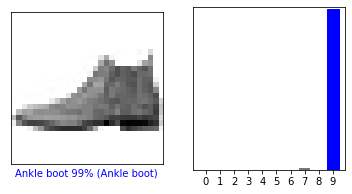

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

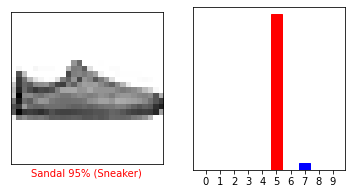

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

몇 개의 이미지의 예측을 출력해 보죠. 올바르게 예측된 레이블은 파란색이고 잘못 예측된 레이블은 빨강색입니다. 숫자는 예측 레이블의 신뢰도 퍼센트(100점 만점)입니다. 신뢰도 점수가 높을 때도 잘못 예측할 수 있습니다.

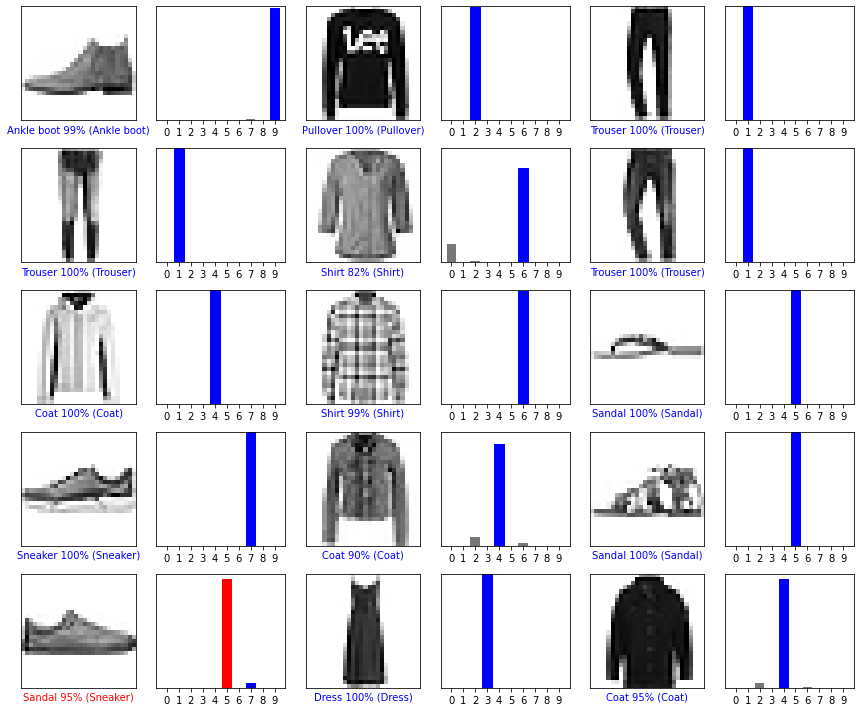

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 훈련된 모델 사용하기

마지막으로 훈련된 모델을 사용하여 한 이미지에 대한 예측을 만듭니다.

In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` 모델은 한 번에 샘플의 묶음 또는 *배치*(batch)로 예측을 만드는데 최적화되어 있습니다. 하나의 이미지를 사용할 때에도 2차원 배열로 만들어야 합니다:

In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


이제 이 이미지의 예측을 만듭니다:

In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.6173755e-05 3.2209617e-14 9.9866760e-01 1.6559891e-11 1.0769934e-03
  1.6140698e-13 2.1918291e-04 3.4505306e-21 3.6745976e-10 1.0840150e-14]]


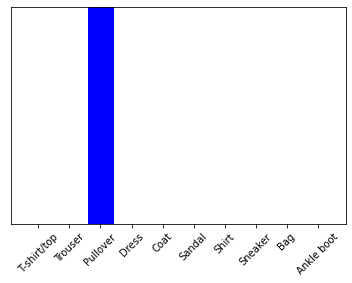

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict`는 데이터 배치의 각 이미지에 대해 하나의 목록씩 목록의 목록을 반환합니다. 배치에서 (유일한) 이미지에 대한 예측을 가져옵니다.

In [31]:
np.argmax(predictions_single[0])

2

예상과 같이 모델이 레이블을 예측합니다.